In [1]:
import awkward as ak
import matplotlib.pyplot as plt
import os, sys
import subprocess
import json
import uproot
from coffea.nanoevents import NanoEventsFactory #, ScoutingNanoAODSchema
from coffea.lookup_tools.lookup_base import lookup_base
import numpy as np
from coffea import processor, util
from hist import Hist
import hist
from coffea.analysis_tools import Weights, PackedSelection
from collections import defaultdict
import mplhep
plt.style.use(mplhep.style.CMS)

In [2]:
mc = util.load("outfiles/Run3Summer22/lumi100isoTrack/cutflow_TTtoLNu2Q_isoTrack.coffea")
data = util.load("outfiles/Run3Summer22/lumi25000hltmu50/cutflow_Run2022D_HLT_Mu50_noCHS.coffea")

In [3]:
lumis = {
    "2022d" : 1624.917355479 #986.530469663 #624.905199074
}
xs = {
    "TTtoLNu2Q" : 762.1,
    "QCD" : 222.1,
}
era = "2022d"

scale_lumi = {k: xs[k] * lumis[era] / w for k, w in mc['sumw'].items()}

/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


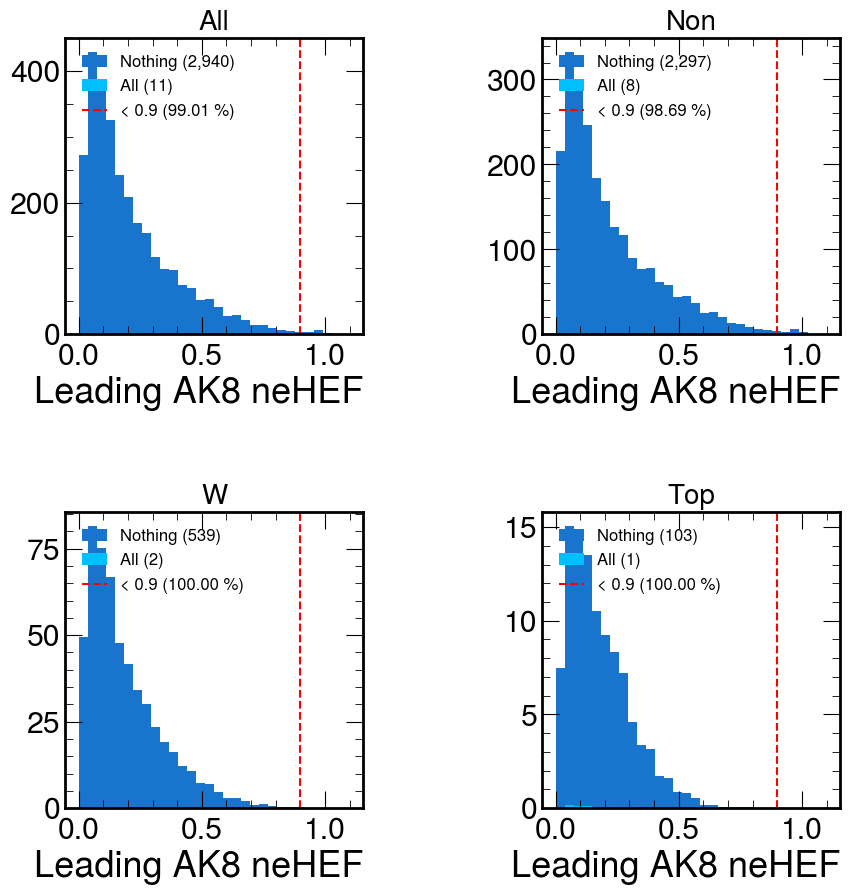

In [4]:
labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

varses = {
    "neHEF" : "ak8jet_neu",
#     "neEmEF" : "ak8jet_neu",
#     "muEmEF" : "ak8jet_mu",
#     "chHEF" : "ak8jet_mu",
#     "nCh" : "ak8jet_ch",
#     "chEmEF" : "ak8jet_ch",
}

varses_cuts = {
    "neHEF" : 0.9,
    "neEmEF" : 0.9,
    "muEmEF" : 0.8,
    "chHEF" : 0.01,
    "nCh" : 0,
    "chEmEF" : 0.8,
}

varses_slices = {
    "neHEF" : slice(hist.underflow+1, 0.9j, sum),
    "neEmEF" : slice(hist.underflow+1, 0.9j, sum),
    "muEmEF" : slice(hist.underflow+1, 0.8j, sum),
    "chHEF" : slice(0.01j, hist.overflow-1, sum),
    "nCh" : slice(0j, hist.overflow-1, sum),
    "chEmEF" : slice(hist.underflow+1, 0.8j, sum),
}

for var, thing in varses.items():
    
    cut = varses_cuts[var]
    sli = varses_slices[var]
    
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    plt.subplots_adjust(wspace=0.6, hspace=0.6)

    row, column = 0, 0

    for i, cat in enumerate([0, 3, 2, 1]):

        if i == 2:
            row = 1
            column = 0

        if i == 0:
            h_no = mc[thing].project("dataset", "region", var, "cat")[{"region" : hist.loc("noselection"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
            h_all = mc[thing].project("dataset", "region", var, "cat")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        else:
            h_no = mc[thing].project("dataset", "region", var, "cat")[:, hist.loc("noselection"), :, hist.loc(cat)]
            h_all = mc[thing].project("dataset", "region", var, "cat")[:, hist.loc("all"), :, hist.loc(cat)]

        for i, name in enumerate(h_no.axes["dataset"]):
            h_no.view(flow=True)[i] *= scale_lumi[name]
            h_all.view(flow=True)[i] *= scale_lumi[name]

        h_no = h_no[{"dataset" : sum}]
        h_all = h_all[{"dataset" : sum}]

        n_no = h_no[slice(hist.underflow+1, hist.overflow-1,sum)].value
        n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

        n_all_cut = h_all[sli].value

        mplhep.histplot(h_no, ax=ax[row, column], color=colours["no"], label=f"Nothing ({n_no:,.0f})", yerr=False, histtype='fill', alpha=1,)
        mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=f"All ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
        
        label = f"< {cut} ({n_all_cut/n_all * 100:,.2f} %)" if cut > 0.1 else f"> {cut} ({n_all_cut/n_all * 100:,.2f} %)"
        ax[row, column].axvline(cut, color='red',ls='--', label=label)

        ax[row, column].legend(loc='best', fontsize=12)
        ax[row, column].set_title(titles[cat], fontsize=20)

        column += 1

/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not plac

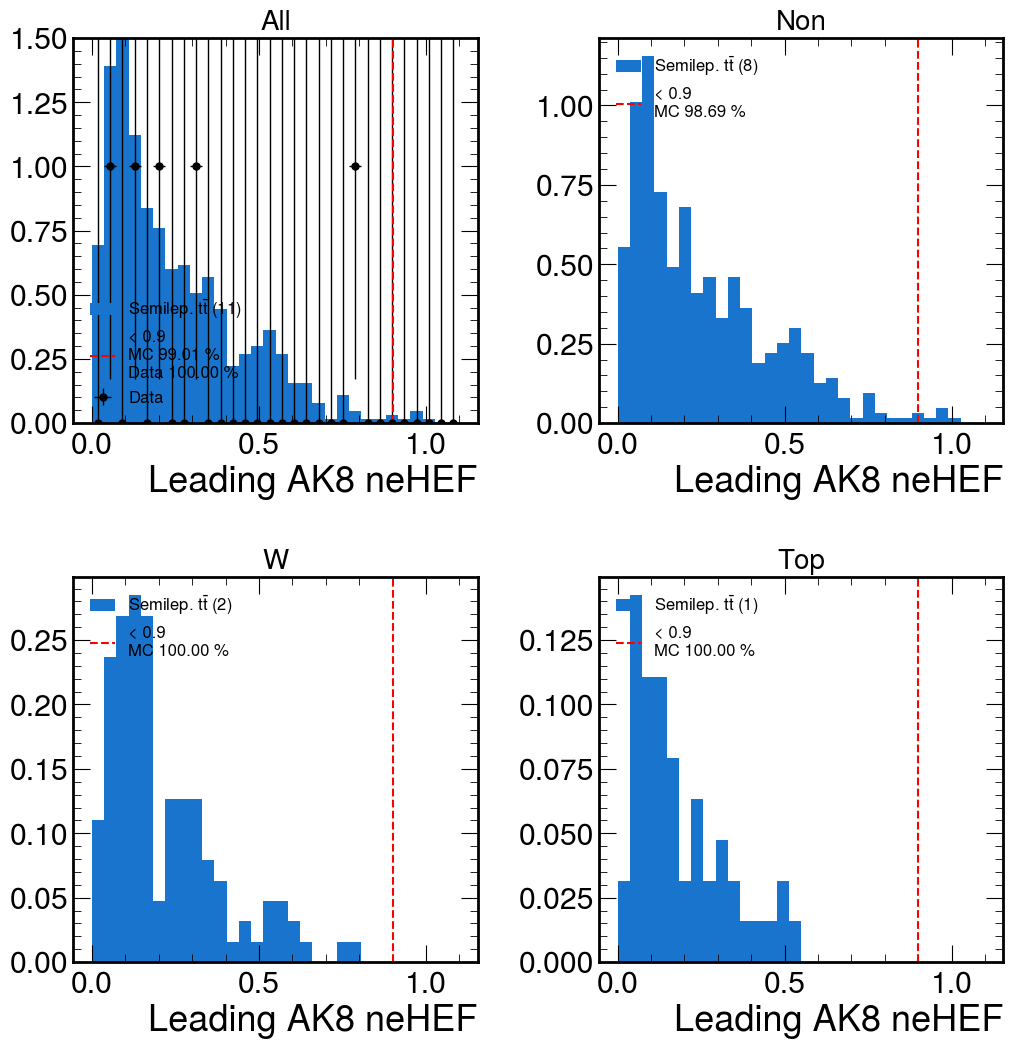

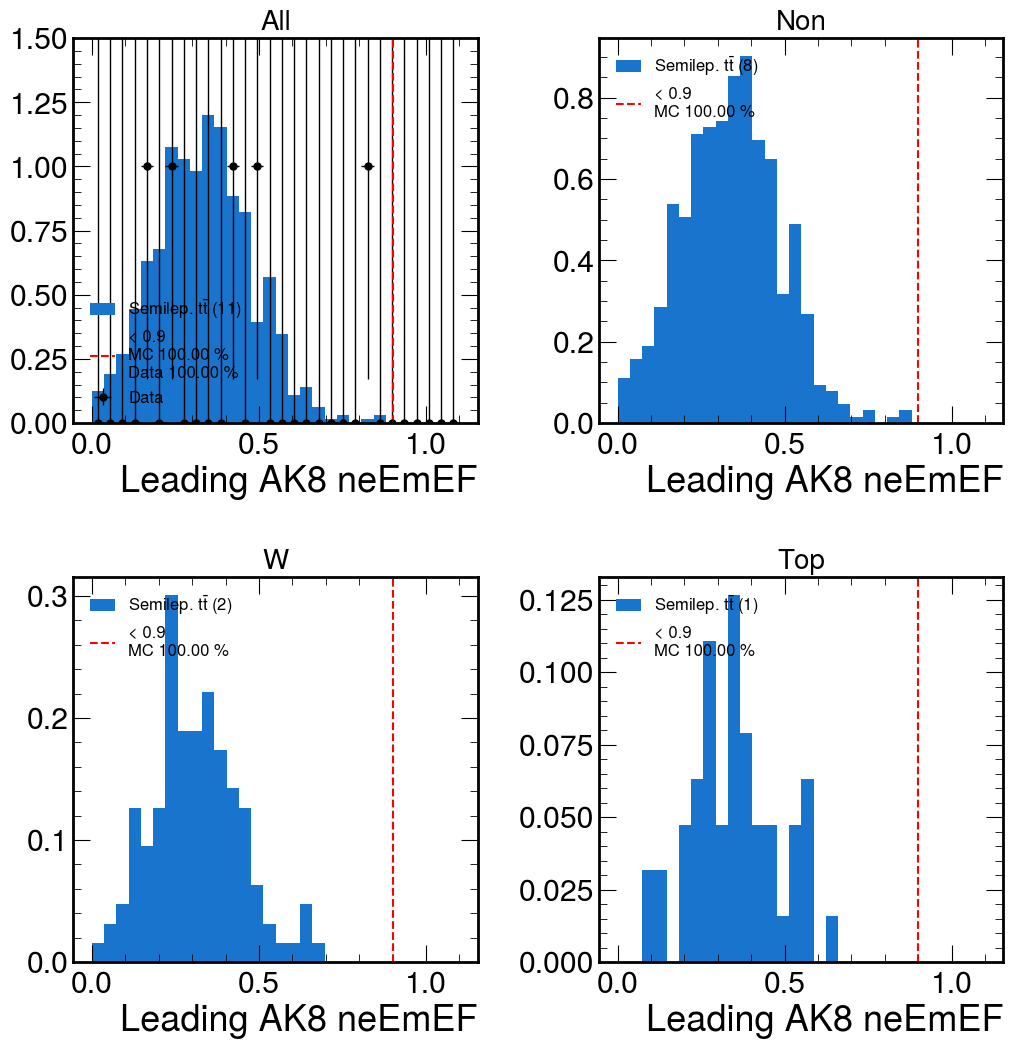

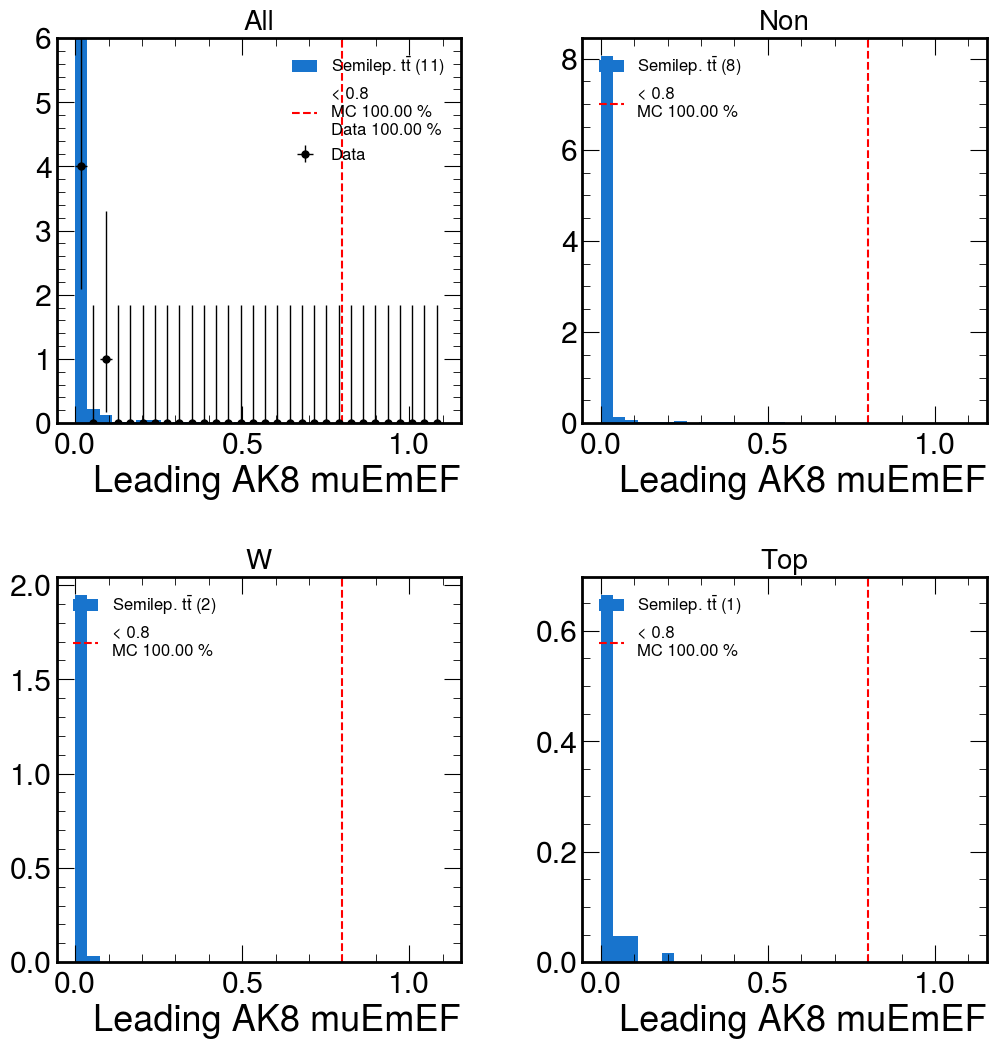

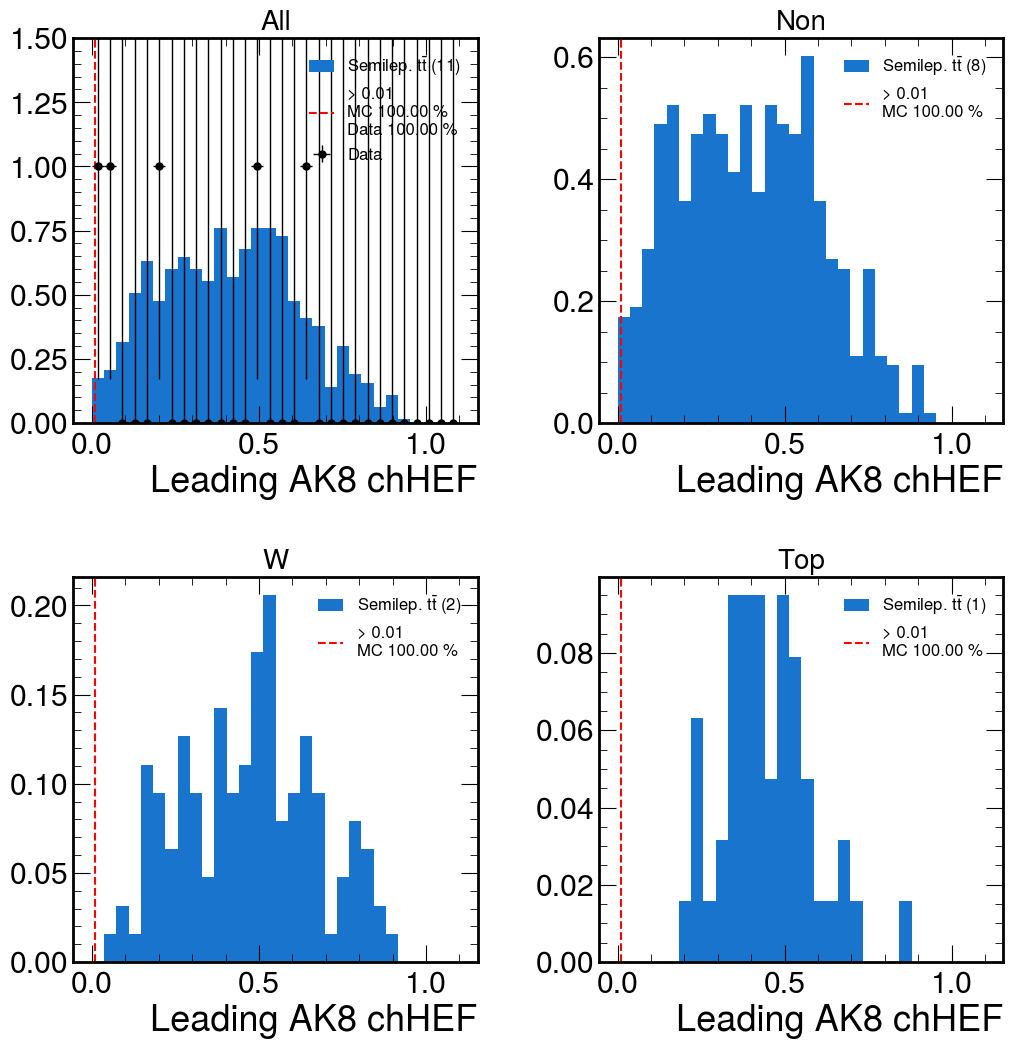

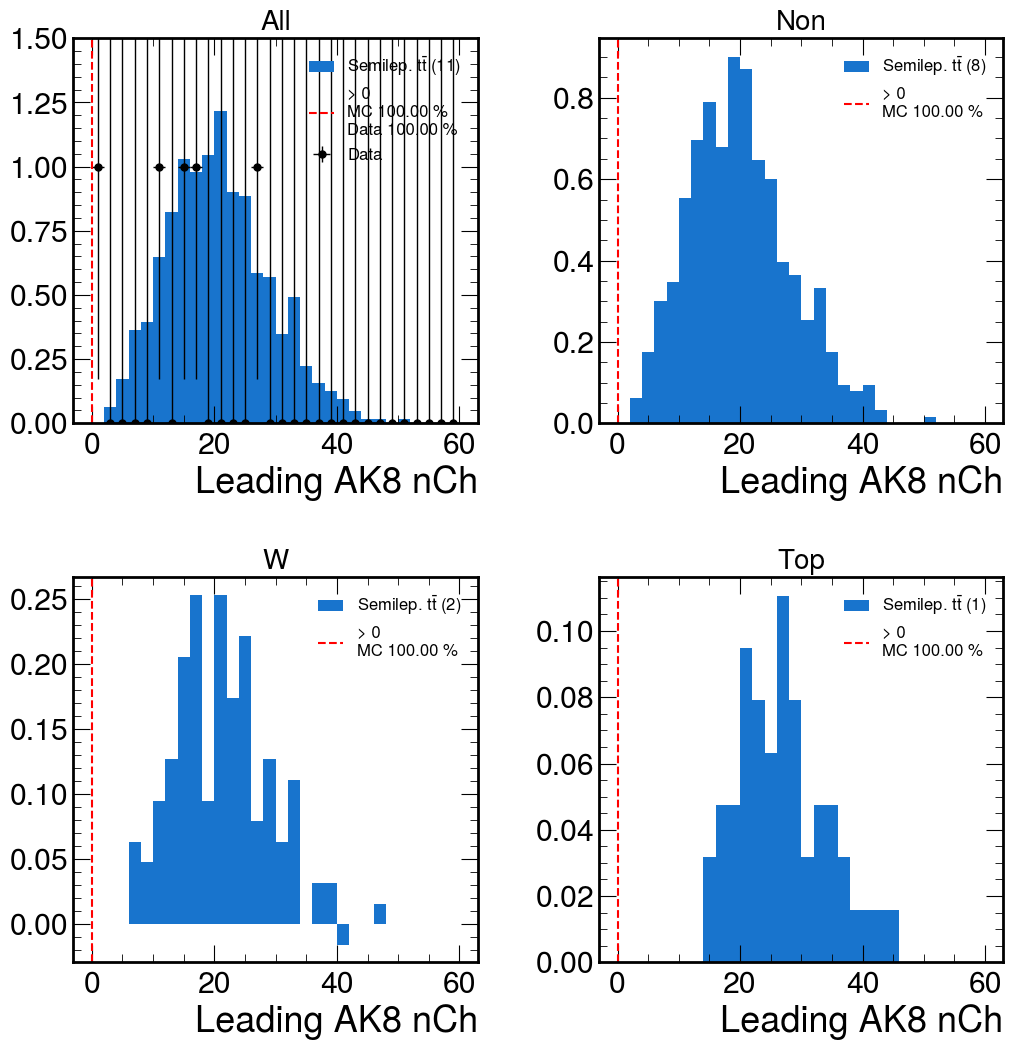

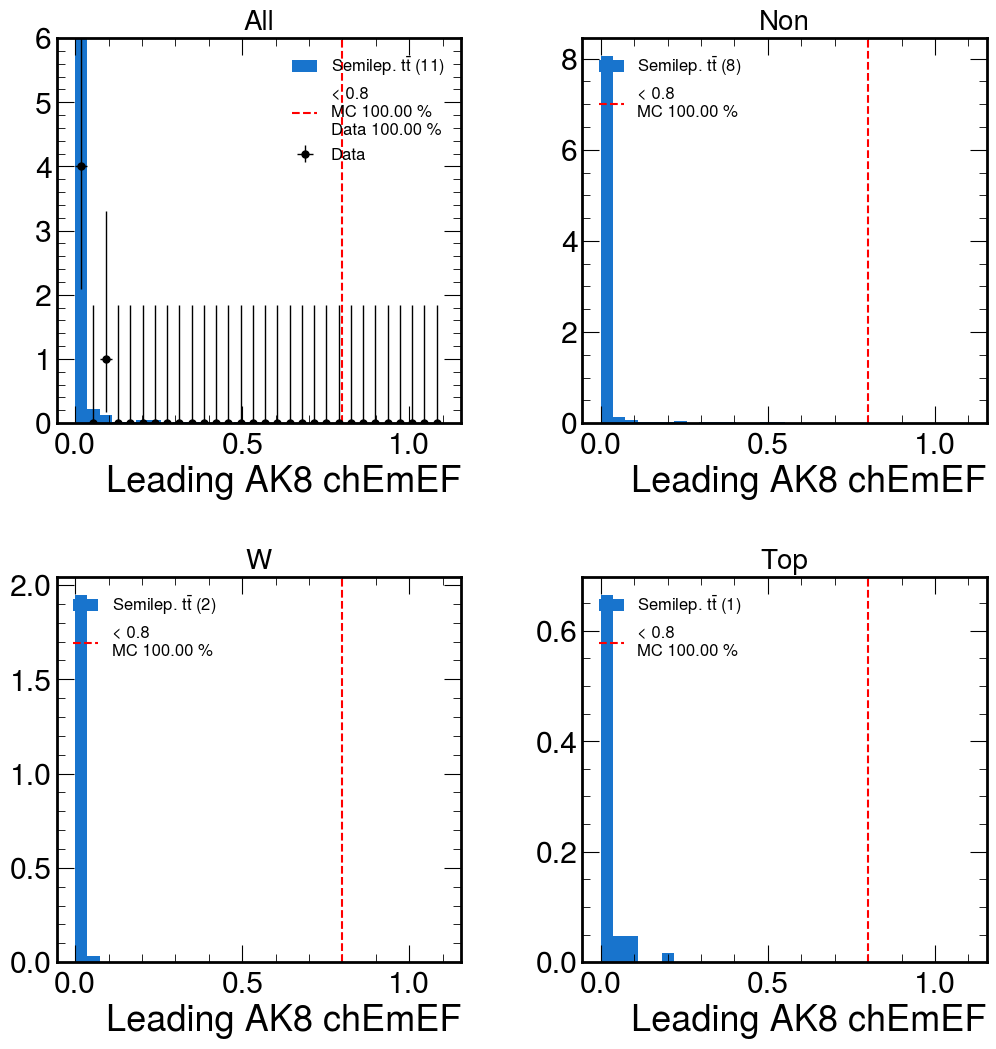

In [5]:
labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "all" : "#1874CD",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

varses = {
    "neHEF" : "ak8jet_neu",
    "neEmEF" : "ak8jet_neu",
    "muEmEF" : "ak8jet_mu",
    "chHEF" : "ak8jet_mu",
    "nCh" : "ak8jet_ch",
    "chEmEF" : "ak8jet_ch",
}

varses_cuts = {
    "neHEF" : 0.9,
    "neEmEF" : 0.9,
    "muEmEF" : 0.8,
    "chHEF" : 0.01,
    "nCh" : 0,
    "chEmEF" : 0.8,
}

varses_slices = {
    "neHEF" : slice(hist.underflow+1, 0.9j, sum),
    "neEmEF" : slice(hist.underflow+1, 0.9j, sum),
    "muEmEF" : slice(hist.underflow+1, 0.8j, sum),
    "chHEF" : slice(0.01j, hist.overflow-1, sum),
    "nCh" : slice(0j, hist.overflow-1, sum),
    "chEmEF" : slice(hist.underflow+1, 0.8j, sum),
}

for var, thing in varses.items():
    
    cut = varses_cuts[var]
    sli = varses_slices[var]
    
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    plt.subplots_adjust(wspace=0.3, hspace=0.4)

    row, column = 0, 0

    for i, cat in enumerate([0, 3, 2, 1]):

        if i == 2:
            row = 1
            column = 0

        if i == 0:
            h_all = mc[thing].project("dataset", "region", var, "cat")[{
                "region" : hist.loc("all"),
                "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]
            }][{"cat" : sum}]
        else:
            h_all = mc[thing].project("dataset", "region", var, "cat")[
                :,
                hist.loc("all"),
                :,
                hist.loc(cat)
            ]

        for j, name in enumerate(h_all.axes["dataset"]):
            h_all.view(flow=True)[j] *= scale_lumi[name]

        h_all = h_all[{"dataset" : sum}]

        n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

        n_all_cut = h_all[sli].value

        mplhep.histplot(h_all, ax=ax[row, column], color=colours["all"], label=r"Semilep. $t\bar{t}$" + f" ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
        
        if i == 0:
            h_data = data[thing].project("region", var)[{
                "region" : hist.loc("all"),
            }]
            mplhep.histplot(h_data, ax=ax[row, column], histtype="errorbar", xerr=True, c="black",label="Data")
            n_data = h_data[slice(hist.underflow+1, hist.overflow-1,sum)].value
            n_data_cut = h_data[sli].value
            ax[row, column].set_ylim([0, max(h_data.values()) * 1.5])
        
        label = f"< {cut}\nMC {n_all_cut/n_all * 100:,.2f} %" if cut > 0.1 else f"> {cut}\nMC {n_all_cut/n_all * 100:,.2f} %"
        if i == 0:
            label += f"\nData {n_data_cut/n_data * 100:,.2f} %"
        ax[row, column].axvline(cut, color='red',ls='--', label=label)

        ax[row, column].legend(loc='best', fontsize=12)
        ax[row, column].set_title(titles[cat], fontsize=20)

        column += 1

/opt/conda/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


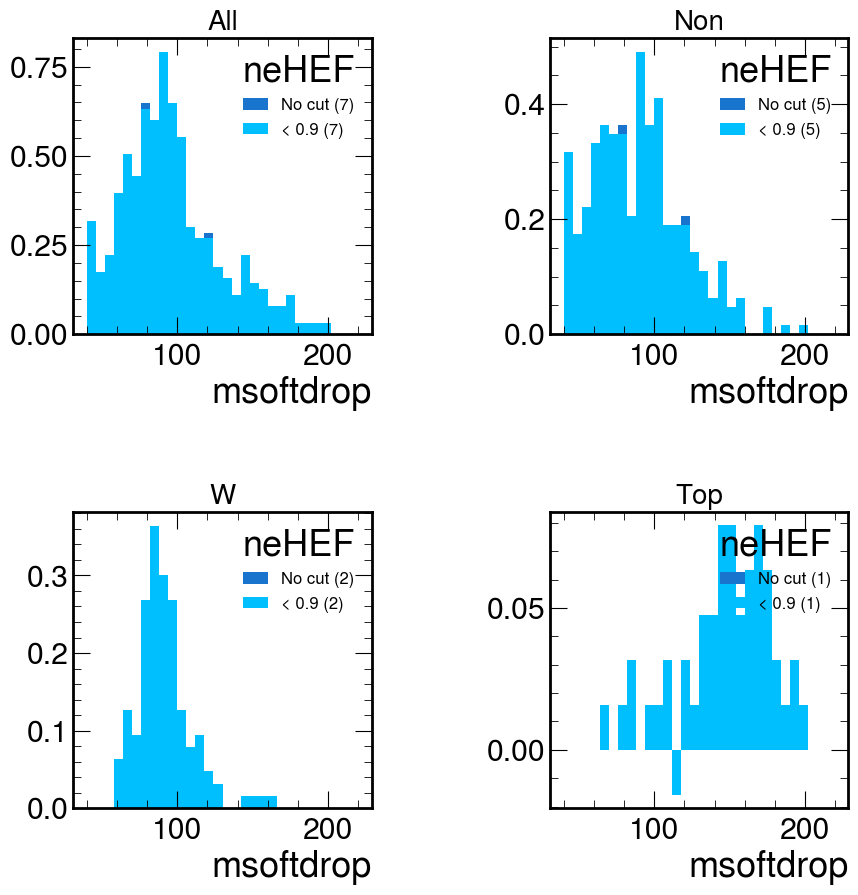

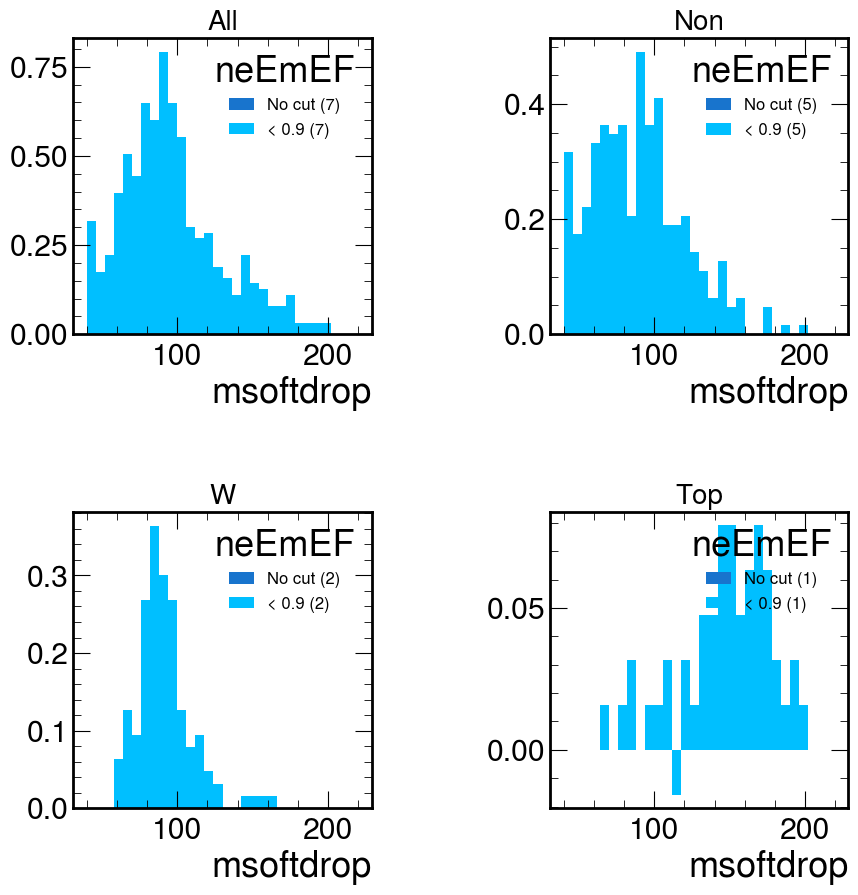

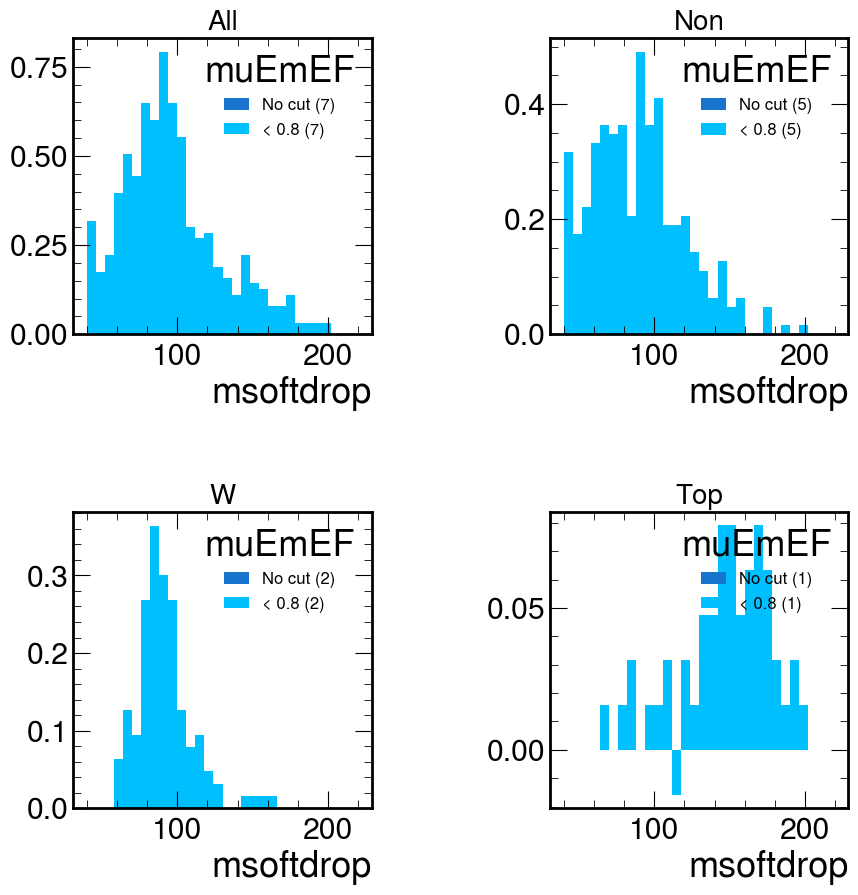

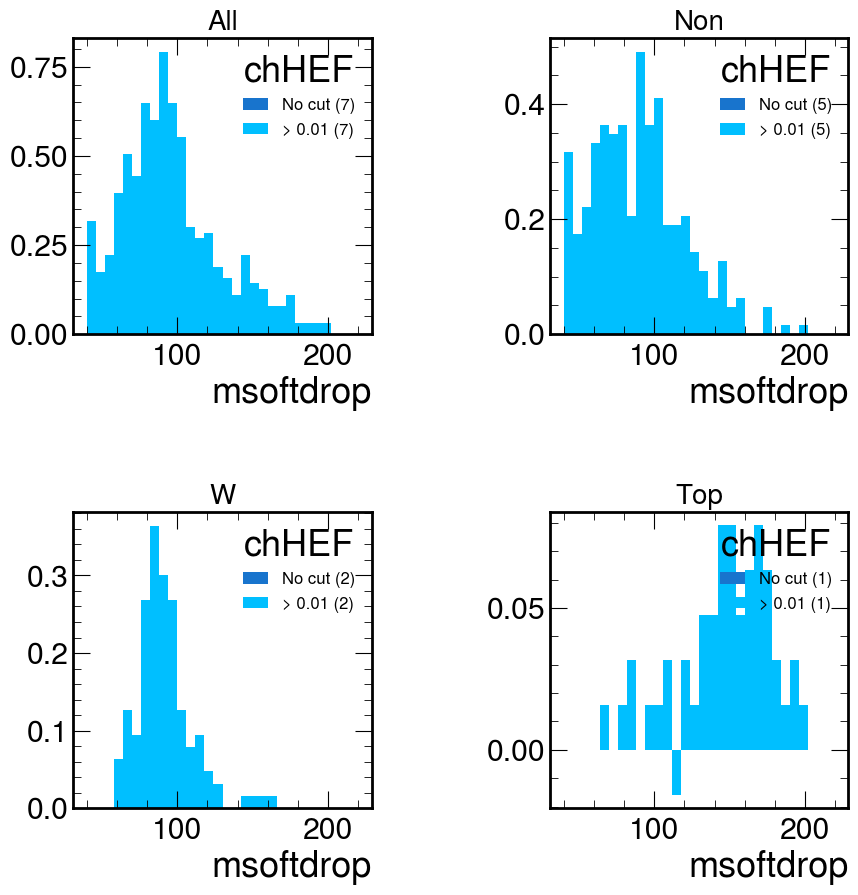

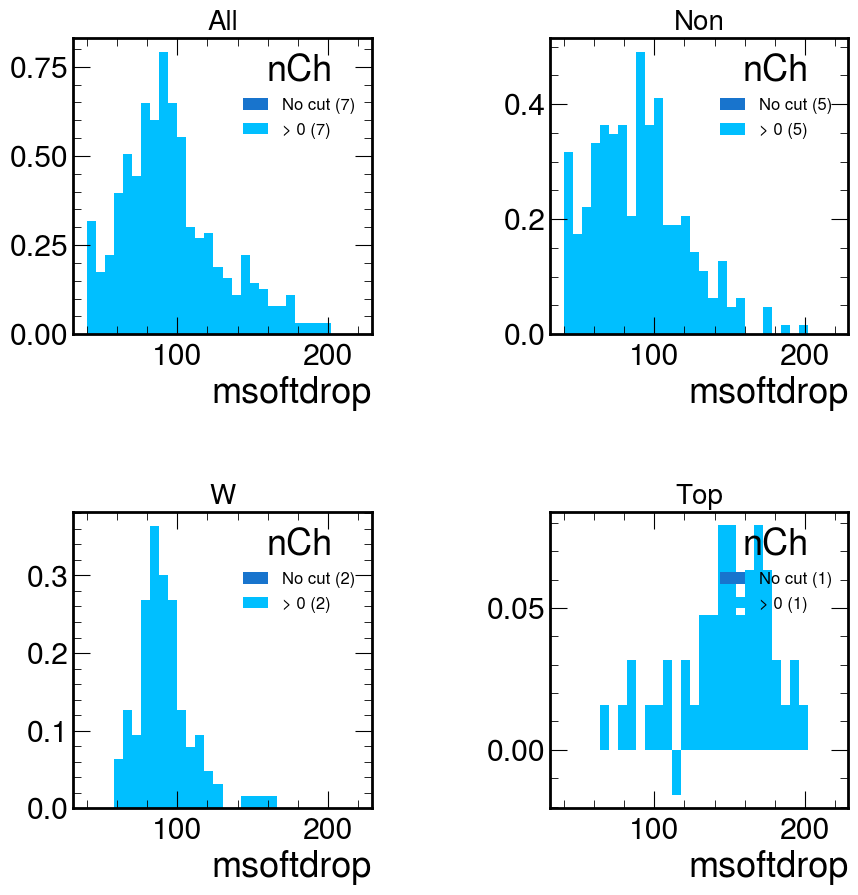

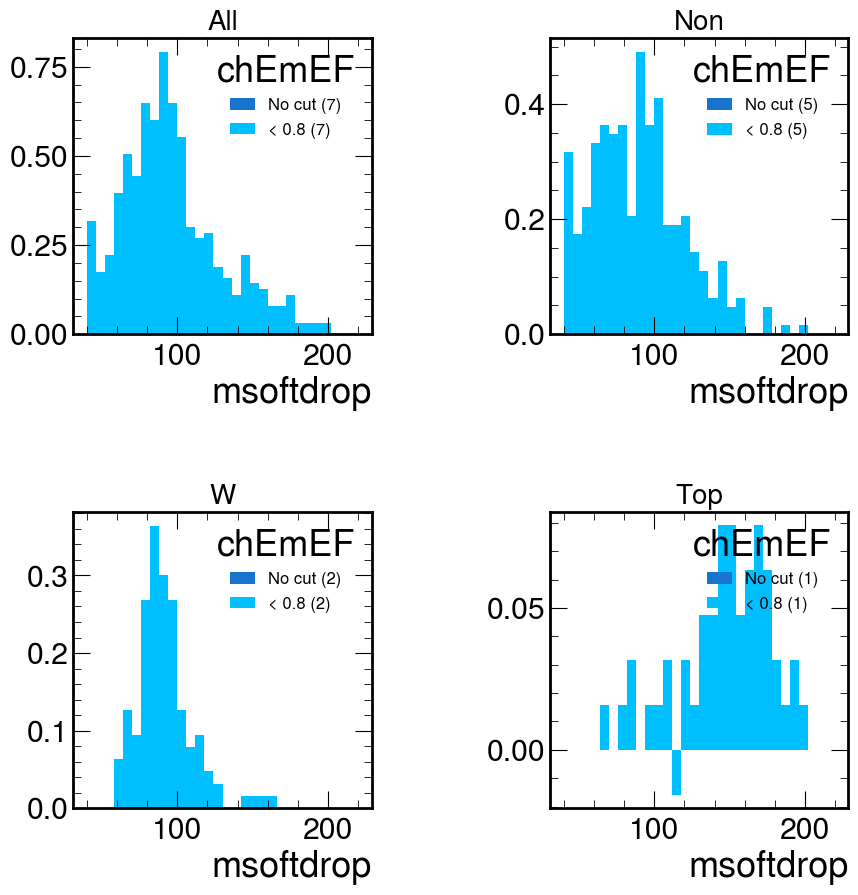

In [7]:
labels = {
    "no" : "Nothing",
    "all" : "All",
}

colours = {
    "no" : "#1874CD", 
    "all" : "#00BFFF",
}

titles = {
    0 : "All",
    3 : "Non",
    2 : "W",
    1 : "Top",
}

varses = {
    "neHEF" : "ak8jet_neu",
    "neEmEF" : "ak8jet_neu",
    "muEmEF" : "ak8jet_mu",
    "chHEF" : "ak8jet_mu",
    "nCh" : "ak8jet_ch",
    "chEmEF" : "ak8jet_ch",
}

varses_cuts = {
    "neHEF" : 0.9,
    "neEmEF" : 0.9,
    "muEmEF" : 0.8,
    "chHEF" : 0.01,
    "nCh" : 0,
    "chEmEF" : 0.8,
}

varses_slices = {
    "neHEF" : slice(hist.underflow+1, 0.9j, sum),
    "neEmEF" : slice(hist.underflow+1, 0.9j, sum),
    "muEmEF" : slice(hist.underflow+1, 0.8j, sum),
    "chHEF" : slice(0.01j, hist.overflow-1, sum),
    "nCh" : slice(0j, hist.overflow-1, sum),
    "chEmEF" : slice(hist.underflow+1, 0.8j, sum),
}

thing = "ak8jet_neu"
var = "neHEF"
cut = 0.9
cutj = 0.9j

for var, thing in varses.items():
    
    cut = varses_cuts[var]
    sli = varses_slices[var]
    
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    plt.subplots_adjust(wspace=0.6, hspace=0.6)

    row, column = 0, 0

    for i, cat in enumerate([0, 3, 2, 1]):

        if i == 2:
            row = 1
            column = 0

        if i == 0:
            h_all = mc[thing].project("dataset", "region", var, "cat", "msoftdrop")[{"region" : hist.loc("all"), "cat" : [hist.loc(3), hist.loc(2), hist.loc(1)]}][{"cat" : sum}]
        else:
            h_all = mc[thing].project("dataset", "region", var, "cat", "msoftdrop")[:, hist.loc("all"), :, hist.loc(cat), :]

        for i, name in enumerate(h_all.axes["dataset"]):
            h_all.view(flow=True)[i] *= scale_lumi[name]

        h_all_cut = h_all[{var : sli, "dataset" : sum}]
        h_all = h_all[{var : sum, "dataset" : sum}]

        n_all_cut = h_all_cut[slice(hist.underflow+1, hist.overflow-1,sum)].value
        n_all = h_all[slice(hist.underflow+1, hist.overflow-1,sum)].value

        mplhep.histplot(h_all, ax=ax[row, column], color=colours["no"], label=f"No cut ({n_all:,.0f})", yerr=False, histtype='fill', alpha=1,)
        
        label = f"< {cut} ({n_all_cut:,.0f})" if cut > 0.1 else f"> {cut} ({n_all_cut:,.0f})"
        mplhep.histplot(h_all_cut, ax=ax[row, column], color=colours["all"], label=label, yerr=False, histtype='fill', alpha=1,)

        ax[row, column].legend(loc='best', fontsize=12, title=var)
        ax[row, column].set_title(titles[cat], fontsize=20)

        column += 1